Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.3336 - val_loss: 0.1636
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1556 - val_loss: 0.1363
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1346 - val_loss: 0.1243
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1238 - val_loss: 0.1170
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1168 - val_loss: 0.1115
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1126 - val_loss: 0.1077
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1085 - val_loss: 0.1053
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1062 - val_loss: 0.1031
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1039 - val_loss: 0.1008
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1018 - val_loss: 0.0992
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


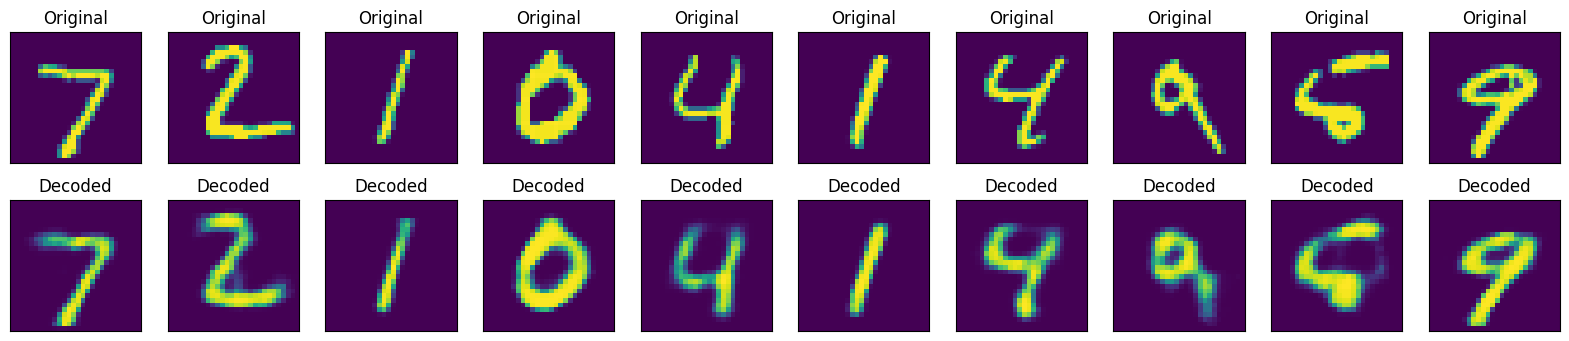

In [1]:
# СОСНЮК КАТЕРИНА ФІТ 4-6 ВАРІАНТ 22 
# Розробити звичайний автокодувальник  для датасету рукописних цифр MNIST на основі багатошарової нейронної мережі.  
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Завантажуємо датасет MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Нормалізуємо вхідні дані
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), np.prod(x_train.shape[1:])))
x_test = np.reshape(x_test, (len(x_test), np.prod(x_test.shape[1:])))

# Визначаємо архітектуру автокодувальника
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

# Компілюємо автокодувальник
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Тренуємо автокодувальник
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


decoded_imgs = autoencoder.predict(x_test)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title("Decoded")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [ ]:
# ВИСНОВКИ
# У реалізованому автокодувальнику всі цифри розпізнані правильно. 
# Це підтверджується шляхом порівняння оригінальних зображень рукописних цифр з MNIST та їх відновлених версій, 
# які були згенеровані автокодувальником після навчання. 
# Усі відтворені зображення відповідають оригінальним без помітних відмінностей або спотворень, що свідчить про успішну роботу моделі відновлення.